In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Users\Omosefunmi temidayo\Downloads\household_power_consumption.txt', sep=';', parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
# in the line of code above, while loading the dataset, i set 'nan' and '?' as null values and merged the 'Date' and 'Time' columns to 'dt', then set 'dt' as the index.
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [2]:
df.shape

(2075259, 7)

In [3]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [4]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
# filling in the NaN values with mean, where 0 to 7 represent the range of the 6 columns in the dataset above
for c in range(0,7):
    df.iloc[:, c] = df.iloc[:, c].fillna(df.iloc[:, c].mean())
    
df.isna().sum()    
    

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [6]:
# creating a new column for the active energy not measured in sub meterings 1, 2 and 3 using the formula in the dataset description
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.099998


In [7]:
# saving the updated dataset as a csv file
df.to_csv('household_power_consumption.csv')

In [8]:
# loading the updated csv file
df = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['dt'], index_col=['dt'])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [9]:
# saving the updated dataset as a csv file
df.to_csv('household_power_consumption.csv')

In [10]:
# loading the updated csv file
df = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['dt'], index_col=['dt'])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


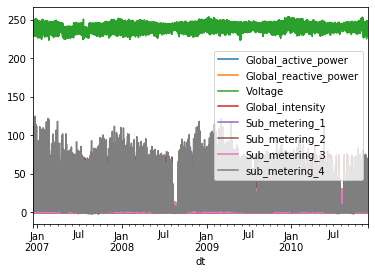

In [11]:
df.plot()

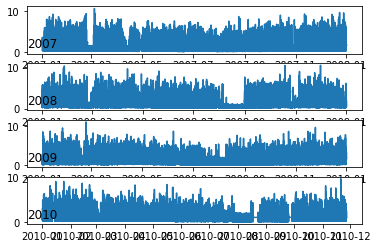

In [12]:
# plotting active power for each year except 2006 because it has less than one month of data
years = ['2007', '2008', '2009', '2010']
plt.figure()
for i in range(len(years)):
    # getting the subplot
    ax = plt.subplot(len(years), 1, i+1)
    # getting the year to plot
    year = years[i]
    # finding all observations for the year
    result = df[str(year)]
    # plotting the active power for the year
    plt.plot(result['Global_active_power'])
    # add a title to the subplot
    plt.title(str(year), y=0, loc='left')
plt.show()

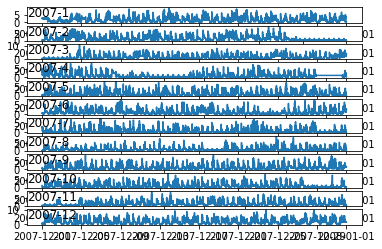

In [13]:
# plot active power for each month in 2007
months = [x for x in range(1, 13)]
plt.figure()
for i in range(len(months)):
    # getting the subplot ready
    ax = plt.subplot(len(months), 1, i+1)
    # getting the month to plot
    month = '2007-' + str(months[i])
    # finding all observations for the month
    result = df[month]
    # plotting the active power for the month
    plt.plot(result['Global_active_power'])
    # adding a title
    plt.title(month, y=0, loc='left')
plt.show()

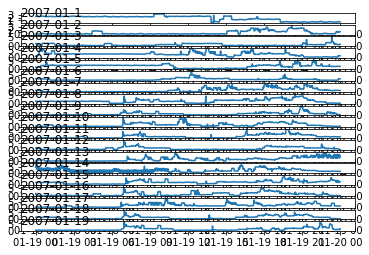

In [14]:
# plot active power for each day
days = [x for x in range(1, 20)]
plt.figure()
for i in range(len(days)):
    # getting the subplot ready
    ax = plt.subplot(len(days), 1, i+1)
    # getting the day to plot
    day = '2007-01-' + str(days[i])
    # finding all observations for the day
    result = df[day]
    # plot the active power for the day
    plt.plot(result['Global_active_power'])
    # add a title to the subplot
    plt.title(day, y=0, loc='left')
plt.show() # the plots below represent the first 20 days of January 2007

                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

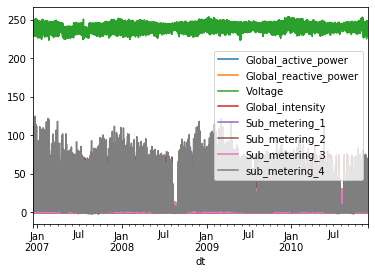

In [15]:
# Average consumption of each month in 4 years
df.groupby(df.index.month).Global_active_power.mean()
print(df.head())
df.plot()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

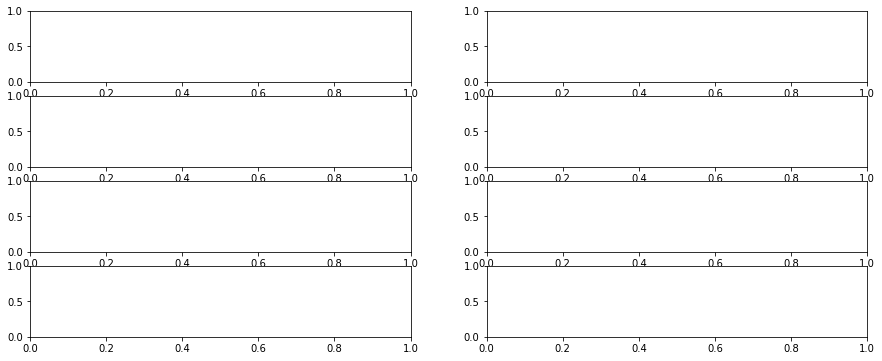

In [16]:
# getting the seasonality and stationarity
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose as SDecompose
rcParams['figure.figsize'] = 15, 6

fig, axes = plt.subplots(4, 2)

mul_decomposition = SDecompose(df.Global_reactive_power, model='multiplicative')
add_decomposition = SDecompose(df.Global_reactive_power, model='additive')

axes[0][0].plot(mul_decomposition.observed)
axes[0][0].set_title("Multiplicative Decomposition")
axes[1][0].plot(mul_decomposition.trend)
axes[2][0].plot(mul_decomposition.seasonal)
axes[3][0].plot(mul_decomposition.resid)

axes[0][1].plot(add_decomposition.observed)
axes[0][1].set_title("Additive Decomposition")
axes[1][1].plot(add_decomposition.trend)
axes[2][1].plot(add_decomposition.seasonal)
axes[3][1].plot(add_decomposition.resid)
plt.show()

In [20]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


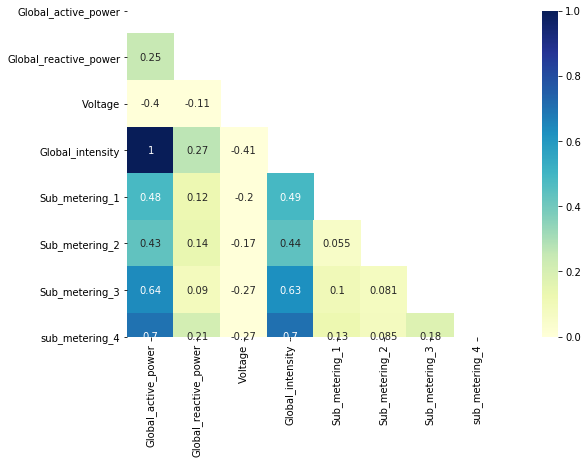

In [21]:
import seaborn as sns
pearson = df.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

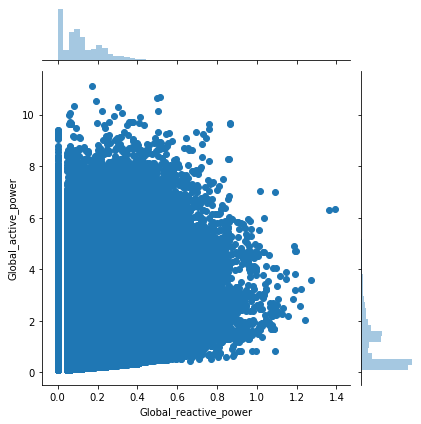

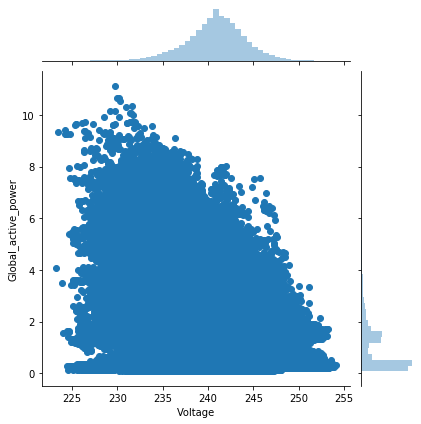

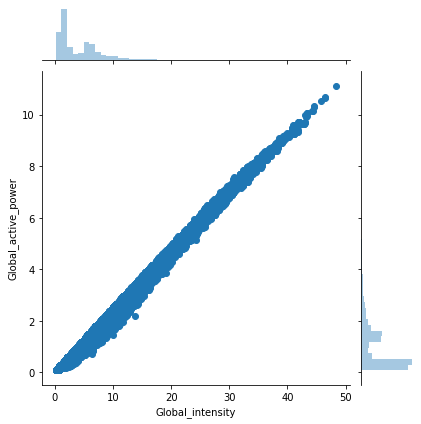

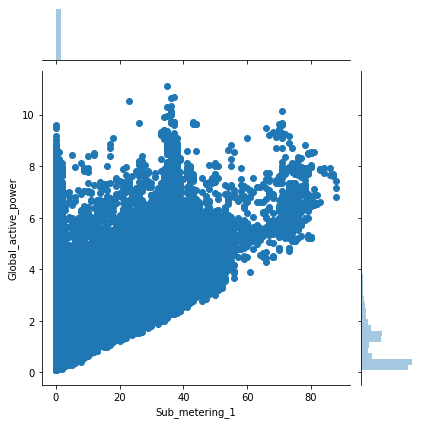

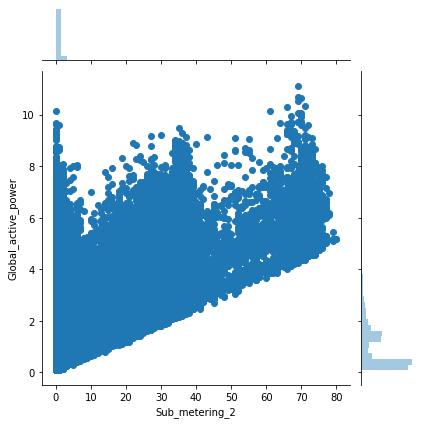

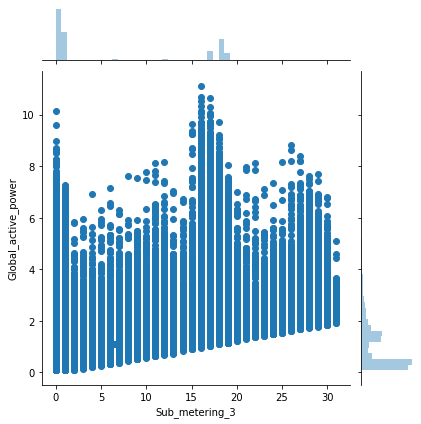

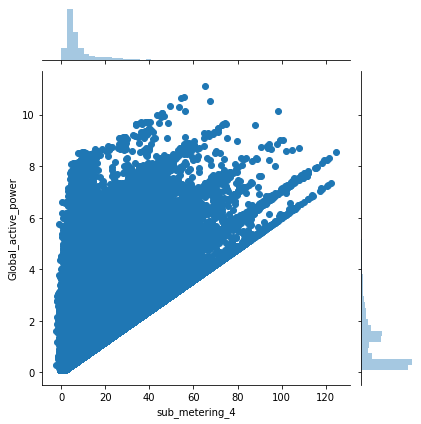

In [22]:
# creating scaatter plots
sns.jointplot( x = 'Global_reactive_power' , y = 'Global_active_power' , data = df , kind = 'scatter')
sns.jointplot( x = 'Voltage' , y = 'Global_active_power' , data = df , kind = 'scatter')
sns.jointplot( x = 'Global_intensity' , y = 'Global_active_power' , data = df , kind = 'scatter')
sns.jointplot( x = 'Sub_metering_1' , y = 'Global_active_power' , data = df , kind = 'scatter')
sns.jointplot( x = 'Sub_metering_2' , y = 'Global_active_power' , data = df , kind = 'scatter')
sns.jointplot( x = 'Sub_metering_3' , y = 'Global_active_power' , data = df , kind = 'scatter')
sns.jointplot( x = 'sub_metering_4' , y = 'Global_active_power' , data = df , kind = 'scatter')

In [23]:
X = df.iloc[:,[1,3,4,5,6]]
y = df.iloc[:,0]

X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


In [24]:
y.head()

dt
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.17588232  0.2366809  -0.0002924  -0.00041025  0.00216129]


Text(0, 0.5, 'Predicted Y')

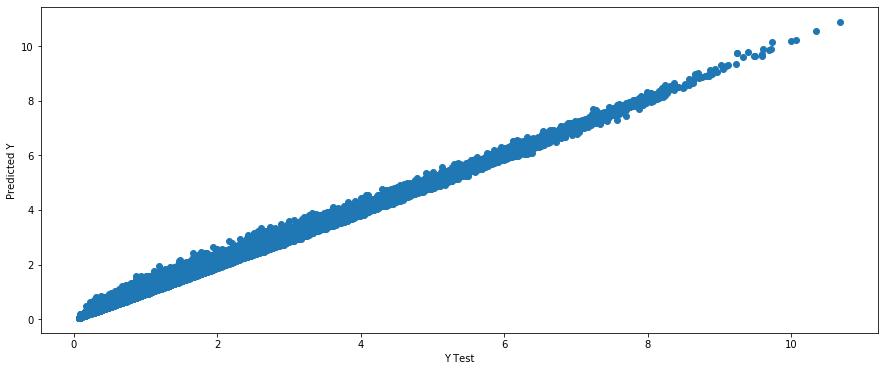

In [27]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ('R Squares value:',metrics.r2_score(y_test, predictions))

MAE: 0.02716003971623216
MSE: 0.001803062534330667
RMSE: 0.04246248384551553
R Squares value: 0.9983631589542357


In [29]:
from sklearn.linear_model import Lasso
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train,y_train)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
lasso_pred = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test,lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test,lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))
print ('R Squares value:',metrics.r2_score(y_test,lasso_pred))

MAE: 0.02716003971623216
MSE: 0.001803062534330667
RMSE: 0.04246248384551553
R Squares value: 0.9983631589542357
